<a href="https://colab.research.google.com/github/TiagoNPBarros/FinancialMarket/blob/main/Bandas_de_Bollinger_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bandas de Bollinger - Parte 1**



Neste notebook, trago para os amigos meu primeiro artigo sobre os indicadores clássicos da análise técnica de mercado financeiro.
Nessa primeira série de notebooks, vamos nos aprofundar no indicador de volatildiade conhecido como Bandas de Bollinger.
Nesta primeira parte vamos aprender como podemos fazer seu calculo em Python e plotar os gráficos, nos notebooks seguintes vamos fazer alguns backtests de  setups que podem ser explorados utilizando este indicador.



**Entendendo as Bandas de Bollinger**


As Bandas de Bollinger(BB) são um indicador de volatilidade criado por John Bollinger. A base do indicador é uma média móvel arítimetica de 20 periodos, a partir dessa média é feito o calculo de duas vezes o desvio padrão dessa média de preços e assim duas curvas são traçadas, a banda superior e a banda inferior. 

Existe um ditado no mercado financeiro que diz "Ou o preço vai pra média ou a média vai pro preço" este é o princípio básico das bandas de Bollinger, podemos entender que os ativos possuem um limite de volatilidade e que tendem a se manter próximos as suas médias. 
A regressão à média é um fenômeno importante e muito bem documentado nos estudos de estatística. Estudos estatísticos indicam que o preço dos ativos tendem a permanecer dentro das bandas na maior parte do tempo, as bandas chegam a conter do preço da ação em 88% do tempo, mais a frente vamos explorar alguns setups clássicos que se aproveitam desse conceito estatístico. 

Outro importante conceito que devemos lembrar a respeito das bandas de Bollinger é que esse é um indicador de VOLATILIDAE e como tal é extremamente útil para "prever" o início e o fim de tendências de movimentação dos preços. A VOLATILIDADE tem um comportamento CÍCLICO: períodos de baixa volatilidade precedem períodos de alta volatilidade, e vice-versa, ou seja, períodos de contração das Bandas de Bollinger (redução na volatilidade) são seguidos de perídos da abertura das bandas (aumento de volatilidade).






**O cálculo das bandas de Bollinger**

Como já comentando anteriormente, as bandas de Bollinger possuem uma matemática relativamente simples e de certa forma familiar à todos que estão envolvidos com o mercado financeiro, é o do desvio padrão multiplcado por um fator (k) geralmente de 2, para cima e para baxio, com base numa média movel aritimética de 20 períodos. A biblioteca Pandas possui funções nativas que serão utilizadas mais adiante. 

Obs: 
Segundo Bollinger, dependendo do mercado e do time frame, os 
parâmetros das BB podem ser alterados:

• MM central de 20 períodos------ 2,0 x dp ------ o mais comumente usado.

• MM central de 1O períodos------ 1,9 x dp.

• MM central de 50 períodos------ 2, 1 x dp.

• Mercados muito voláteis ---------- 2,62 x dp.


**Importando as bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance

import yfinance as yf 

**Aquisição de dados**

Vamos trabalhar com 3 atvios: Vale(VALE3), Ambev(ABEV3) e o indice Ibovespa (IBOV)

In [ ]:
VALE3 = yf.download('VALE3.SA', start='2019-01-01', end="2021-06-30")[["Open","High","Low","Adj Close"]]
ABEV3 = yf.download('ABEV3.SA', start='2019-01-01', end="2021-06-30")[["Open","High","Low","Adj Close"]]
IBOV = yf.download('^BVSP', start='2019-01-01', end="2021-06-30")[["Open","High","Low","Adj Close"]]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
IBOV.head()

,Open,High,Low,Adj Close
Date,,,,
2019-01-02,87887.0,91479.0,87536.0,91012.0
2019-01-03,91011.0,91596.0,89922.0,91564.0
2019-01-04,91577.0,92701.0,90824.0,91841.0
2019-01-07,91845.0,92552.0,91288.0,91699.0
2019-01-08,91699.0,92231.0,91064.0,92032.0


In [ ]:
VALE3.head()

,Open,High,Low,Adj Close
Date,,,,
2019-01-02,50.009998,51.369999,49.790001,44.829338
2019-01-03,50.799999,50.939999,48.400002,42.995453
2019-01-04,49.820000,52.450001,49.820000,45.794544
2019-01-07,52.869999,53.650002,51.720001,45.548859
2019-01-08,52.200001,52.799999,51.619999,45.987583


In [ ]:
ABEV3.head()

,Low
Date,
2019-01-02,15.400000
2019-01-03,15.890000
2019-01-04,16.030001
2019-01-07,16.340000
2019-01-08,16.090000


Calculando as Bandas de Bollinger


In [ ]:
N = 20 #Número de periodos analisado, na caso 20 dias
k = 2 #Fator multiplicador do desvio padrão para a criação das bandas de BollingeR

VALE3['Desv_Pad'] = VALE3['Adj Close'].rolling(N).std()
VALE3['MMA20'] = VALE3['Adj Close'].rolling(N).mean()
VALE3['Banda_Sup'] = VALE3['MMA20'] + VALE3['Desv_Pad'] * k
VALE3['Banda_Inf'] = VALE3['MMA20'] - VALE3['Desv_Pad'] * k

IBOV['Desv_Pad'] = IBOV['Adj Close'].rolling(N).std()
IBOV['MMA20'] = IBOV['Adj Close'].rolling(N).mean()
IBOV['Banda_Sup'] = IBOV['MMA20'] + IBOV['Desv_Pad'] * k
IBOV['Banda_Inf'] = IBOV['MMA20'] - IBOV['Desv_Pad'] * k

ABEV3['Desv_Pad'] = ABEV3['Adj Close'].rolling(N).std()
ABEV3['MMA20'] = ABEV3['Adj Close'].rolling(N).mean()
ABEV3['Banda_Sup'] = ABEV3['MMA20'] + ABEV3['Desv_Pad'] * k
ABEV3['Banda_Inf'] = ABEV3['MMA20'] - ABEV3['Desv_Pad'] * k


In [ ]:
IBOV.tail(
    5)

,Open,High,Low,Adj Close,Desv_Pad,MMA20,Banda_Sup,Banda_Inf
Date,,,,,,,,
2021-06-23,128769.0,129901.0,128182.0,128428.0,1976.905612,128529.70,132483.511225,124575.888775
2021-06-24,128433.0,129541.0,128428.0,129514.0,1671.424998,128805.95,132148.799996,125463.100004
2021-06-25,129513.0,129748.0,126697.0,127256.0,1364.210217,128950.40,131678.820434,126221.979566
2021-06-28,127255.0,128067.0,126629.0,127429.0,1170.075913,129043.80,131383.951826,126703.648174
2021-06-29,127429.0,127507.0,126184.0,127327.0,1048.851717,129099.35,131197.053433,127001.646567


In [ ]:
VALE3.tail()

,Open,High,Low,Adj Close,Desv_Pad,MMA20,Banda_Sup,Banda_Inf
Date,,,,,,,,
2021-06-23,112.410004,114.250000,112.160004,110.880333,2.219407,109.413791,113.852605,104.974977
2021-06-24,111.720001,111.919998,110.269997,111.029999,2.223625,109.561996,114.009245,105.114746
2021-06-25,111.599998,113.970001,111.400002,112.400002,2.303842,109.739965,114.347649,105.132282
2021-06-28,113.239998,113.699997,110.010002,110.599998,2.310393,109.798516,114.419303,105.177730
2021-06-29,110.599998,113.050003,110.599998,112.510002,2.307449,109.796156,114.411053,105.181258


In [ ]:
ABEV3.tail()

,Open,High,Low,Adj Close,Desv_Pad,MMA20,Banda_Sup,Banda_Inf
Date,,,,,,,,
2021-06-23,18.129999,18.42,17.900000,17.990000,0.677483,18.7860,20.140966,17.431034
2021-06-24,18.100000,18.10,17.719999,17.950001,0.635618,18.8100,20.081236,17.538764
2021-06-25,17.830000,18.00,16.950001,16.950001,0.720161,18.7730,20.213323,17.332678
2021-06-28,17.170000,17.65,17.000000,17.500000,0.747504,18.7555,20.250509,17.260492
2021-06-29,17.350000,17.50,16.900000,17.290001,0.797812,18.7225,20.318124,17.126877


**Plotando gráficos**

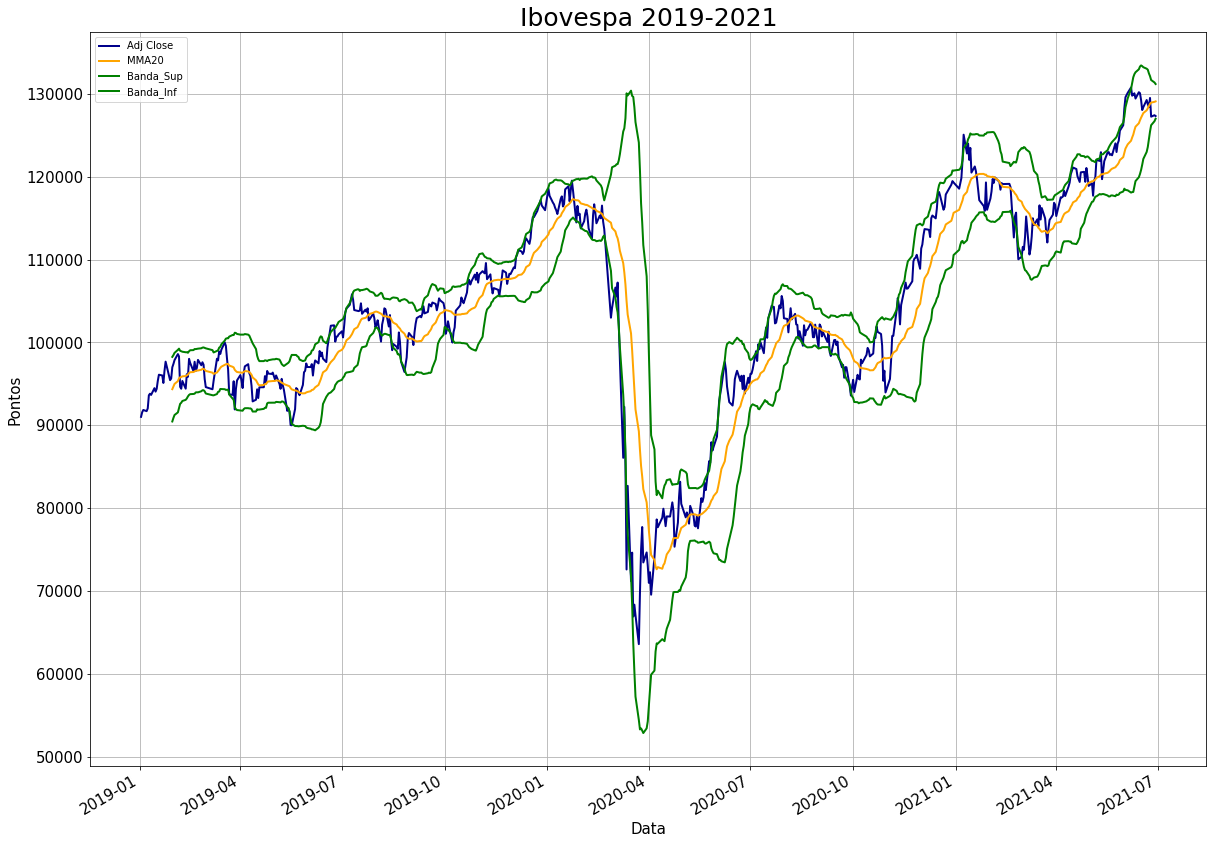

In [ ]:
IBOV[["Adj Close", "MMA20", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 15)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "green"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Pontos"
           , fontsize = 15);
plt.title("Ibovespa 2019-2021"
           , fontsize = 25)
plt.legend();

No gráfico acima temos o principal indice da bolsa, o IBOV, no período de Janeiro de 2019 até o final de Junho de 2021.
Podemos perceber que a o preço, representado pela linha azul, tende a se manter dentro das bandas superiores e inferiores,linhas em verde, na maior parte do tempo.

O ano de 2019 foi um ano com bastante força compradora, foi um ano com forte tendência de alta, mas podemos perceber que os topos de mercado tendem a se localizar próximos as bandas superiores bem como os fundos de mercado são proximos as bandas inferiores, como é visto em agosto (topo) e outubro (fundo). 

Após forte alta em 2019, o ano de 2020 se inicia com uma redução de sua volatidade, representada pela contração de bandas de Janeiro a Março, essa contração vem seguida de uma forte queda e alta volatilidade  provocando uma expansão nas bandas de Bollinger, esse período ficou marcado pelo "Corona Crash". Ainda em 2019 em Maio venos mais uma contração de bandas seguido por um perído de forte alta no mercado, e outro período de redução de volatilidade entre Agosto e Outubro, seguido de mais uma forte alta até Janeiro de 2021.

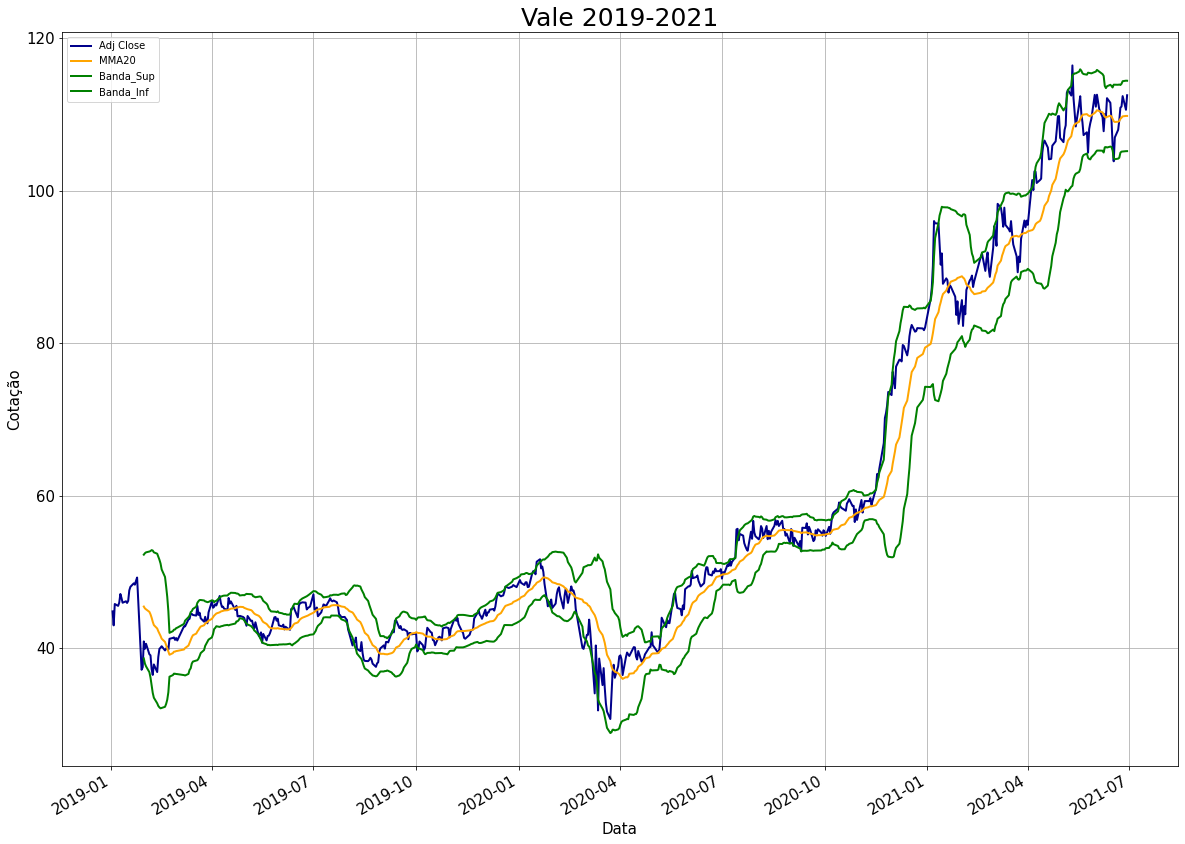

In [ ]:
VALE3[["Adj Close", "MMA20", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 15)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "green"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Cotação"
           , fontsize = 15);
plt.title("Vale 2019-2021"
           , fontsize = 25)
plt.legend();

Podemos observar que o ano de 2019 começou extremamente volátil para a Vale, a forte queda vista no gráfico (e consequentimente a abertura de bandas) foi provocada pela trajédia de Brumadinho que ocorreu no final de Janeiro de 2019.
Na sequencia, o ativo apresetou pouca volatilidade, apresentando um comportamento lateral na maior parte do temo, sem grandes movimentações.

Após o Corona Crash no incio de 2020 o que nos chama atenção no gráfico é o período de contração de volatilidade entre Agosto e Outubro seguido do forte Bull Market que vemos até hoje.

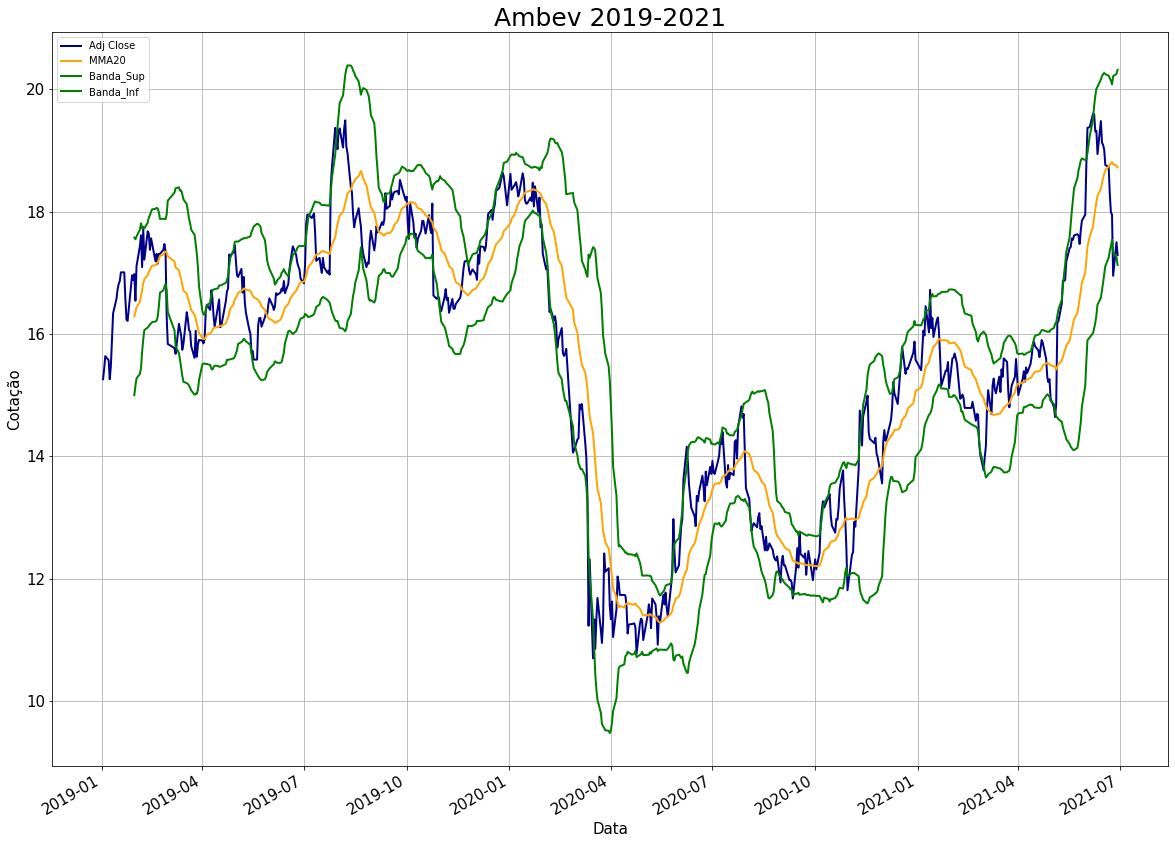

In [ ]:
ABEV3[["Adj Close", "MMA20", "Banda_Sup", "Banda_Inf"]].plot(grid = True
                                                        , figsize = (20, 15)
                                                        , linewidth = 2
                                                        , fontsize = 15
                                                        , color = ["darkblue", "orange", "green", "green"])
plt.xlabel("Data"
           , fontsize = 15);
plt.ylabel("Cotação"
           , fontsize = 15);
plt.title("Ambev 2019-2021"
           , fontsize = 25)
plt.legend();

No gráfico acima, vemos que a Ambev apresenta um comportamento bem mais volátil do que a Vale ou o indice IBOVESPA para o perído observado. Podemos notar isso devido ao afastamento entre as bandas de Bollinger superiores e inforiores.

O ativo apresentou um comportamento mais errático que o outros mas apesar da pouca movimentação em uma tendencia clara e bastante volatilidade, os preços também tendem a se manter dentro das Bollinger, 

**Considerações finais**

Deixo como comsiderações finais dois pontos que gostaria de fixar bastante na mente de todos os leitores que por ventura encontrem esse breve estudo:

1- Podemos ver que de fato os preços tendem a se manter dentro dos limites das bandas de Bollinger e retornar à média móvel aritimética de 20 perídos, da qual as bandas são calculcadas ;

2- Momentos de contração de bandas, ou seja redução de volatilidade, normalmente são seguidos de aberturas de bandas, ou seja aumento de volatilidade. 

Esses dois conceitos são a base da maioria dos trade systems baseados neste indicador. 
